<a href="https://colab.research.google.com/github/gabrielamadalska/voting-statistic/blob/main/voting_statistic_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Reading and preparing data


In [ ]:
data = pd.read_csv("kandydaci.csv", delimiter=";")

Checking prepered the data


In [ ]:
data

,Pozycja na karcie,Nazwisko,Imiona,Płeć,Wiek,Wykształcenie,Zawód,Miejsce pracy,Miejsce zamieszkania,Przynależność do partii,Nazwa komitetu,Sygnatura,TERYT m. z.,Gmina m.z.,Liczba głosów,Procent wszystkich głosów,Wybrany,Druga tura
0,1,BIEDROŃ,Robert,Mężczyzna,44,wyższe politologiczne,poseł do Parlamentu Europejskiego,NaN,Warszawa,członek partii politycznej: Wiosna Roberta Bie...,KOMITET WYBORCZY KANDYDATA NA PREZYDENTA RZECZ...,ZPOW-6020-6/20,146501,Warszawa,432129,"2,22",Nie,Nie
1,2,BOSAK,Krzysztof,Mężczyzna,38,średnie,poseł na Sejm Rzeczypospolitej Polskiej,NaN,Warszawa,członek partii politycznej: Konfederacja Wolno...,KOMITET WYBORCZY KANDYDATA NA PREZYDENTA RZECZ...,ZPOW-6020-1/20,146501,Warszawa,1317380,"6,78",Nie,Nie
2,3,DUDA,Andrzej Sebastian,Mężczyzna,48,wyższe prawnicze,Prezydent Rzeczypospolitej Polskiej,NaN,Kraków,nie należy do partii politycznej,KOMITET WYBORCZY KANDYDATA NA PREZYDENTA RZECZ...,ZPOW-6020-5/20,126101,m. Kraków,8450513,"43,50",Nie,Tak
3,4,HOŁOWNIA,Szymon Franciszek,Mężczyzna,43,średnie,publicysta,własna działalność gospodarcza,Otwock,nie należy do partii politycznej,KOMITET WYBORCZY KANDYDATA NA PREZYDENTA RZECZ...,ZPOW-6020-4/20,141702,m. Otwock,2693397,"13,87",Nie,Nie
4,5,JAKUBIAK,Marek,Mężczyzna,61,średnie,menadżer,Browary Regionalne Jakubiak Sp. z o.o.,Warszawa,członek partii politycznej: Federacja dla Rzec...,KOMITET WYBORCZY KANDYDATA NA PREZYDENTA RZECZ...,ZPOW-6020-28/20,146501,Warszawa,33652,"0,17",Nie,Nie
5,6,KOSINIAK-KAMYSZ,Władysław Marcin,Mężczyzna,38,wyższe medyczne,poseł na Sejm Rzeczypospolitej Polskiej,NaN,Kraków,członek partii politycznej: Polskie Stronnictw...,KOMITET WYBORCZY KANDYDATA NA PREZYDENTA RZECZ...,ZPOW-6020-2/20,126101,m. Kraków,459365,"2,36",Nie,Nie
6,7,PIOTROWSKI,Mirosław Mariusz,Mężczyzna,54,wyższe historyczne,nauczyciel akademicki,Wyższa Szkoła Kultury Społecznej i Medialnej,Lublin,członek partii politycznej: Ruch Prawdziwa Eur...,KOMITET WYBORCZY KANDYDATA NA PREZYDENTA RZECZ...,ZPOW-6020-9/20,66301,m. Lublin,21065,"0,11",Nie,Nie
7,8,TANAJNO,Paweł Jan,Mężczyzna,44,wyższe w zakresie zarządzania,przedsiębiorca,IAM4U.pl Sp. z o.o.,Warszawa,nie należy do partii politycznej,KOMITET WYBORCZY KANDYDATA NA PREZYDENTA RZECZ...,ZPOW-6020-13/20,146501,Warszawa,27909,"0,14",Nie,Nie
8,9,TRZASKOWSKI,Rafał Kazimierz,Mężczyzna,48,wyższe politologiczne,pracownik samorządowy,Urząd m.st. Warszawy,Warszawa,członek partii politycznej: Platforma Obywatel...,KOMITET WYBORCZY KANDYDATA NA PREZYDENTA RZECZ...,ZPOW-6020-41/20,146501,Warszawa,5917340,"30,46",Nie,Tak
9,10,WITKOWSKI,Waldemar Włodzimierz,Mężczyzna,66,wyższe,zarządca,Spółdzielnia Mieszkaniowa im. Hipolita Cegiels...,Poznań,członek partii politycznej: Unia Pracy,KOMITET WYBORCZY KANDYDATA NA PREZYDENTA RZECZ...,ZPOW-6020-20/20,306401,m. Poznań,27290,"0,14",Nie,Nie


Cutting out the nessesary data

In [ ]:
df = pd.DataFrame(data, columns = ["Nazwisko", "Liczba głosów", "Procent wszystkich głosów"])
#df.reset_index(drop=True, col_level=1)
#(drop= True, inplace = True, col_level=0)
#ZMIANA INDEXU

In [ ]:
df.index = df.index+1
df

,Nazwisko,Liczba głosów,Procent wszystkich głosów
1,BIEDROŃ,432129,"2,22"
2,BOSAK,1317380,"6,78"
3,DUDA,8450513,"43,50"
4,HOŁOWNIA,2693397,"13,87"
5,JAKUBIAK,33652,"0,17"
6,KOSINIAK-KAMYSZ,459365,"2,36"
7,PIOTROWSKI,21065,"0,11"
8,TANAJNO,27909,"0,14"
9,TRZASKOWSKI,5917340,"30,46"
10,WITKOWSKI,27290,"0,14"


Repleacing commas with dots so Python can see them

In [ ]:
df.columns = ["Nazwisko", "Liczba glosow", "Procent wszystkich glosow"]
df

,Nazwisko,Liczba glosow,Procent wszystkich glosow
1,BIEDROŃ,432129,"2,22"
2,BOSAK,1317380,"6,78"
3,DUDA,8450513,"43,50"
4,HOŁOWNIA,2693397,"13,87"
5,JAKUBIAK,33652,"0,17"
6,KOSINIAK-KAMYSZ,459365,"2,36"
7,PIOTROWSKI,21065,"0,11"
8,TANAJNO,27909,"0,14"
9,TRZASKOWSKI,5917340,"30,46"
10,WITKOWSKI,27290,"0,14"


In [ ]:
new_headlines = []
for column in df.columns:
  column = column.replace(" ", "_").upper()
  
  new_headlines.append(column)

df.columns = new_headlines
df.columns
df


,NAZWISKO,LICZBA_GLOSOW,PROCENT_WSZYSTKICH_GLOSOW
1,BIEDROŃ,432129,"2,22"
2,BOSAK,1317380,"6,78"
3,DUDA,8450513,"43,50"
4,HOŁOWNIA,2693397,"13,87"
5,JAKUBIAK,33652,"0,17"
6,KOSINIAK-KAMYSZ,459365,"2,36"
7,PIOTROWSKI,21065,"0,11"
8,TANAJNO,27909,"0,14"
9,TRZASKOWSKI,5917340,"30,46"
10,WITKOWSKI,27290,"0,14"


In [ ]:
df["PROCENT_WSZYSTKICH_GLOSOW"] = df["PROCENT_WSZYSTKICH_GLOSOW"].str.replace(",", ".")

Replacing object with float to use values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 1 to 11
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   NAZWISKO                   11 non-null     object
 1   LICZBA_GLOSOW              11 non-null     int64 
 2   PROCENT_WSZYSTKICH_GLOSOW  11 non-null     object
dtypes: int64(1), object(2)
memory usage: 396.0+ bytes


In [ ]:
df["PROCENT_WSZYSTKICH_GLOSOW"] = df["PROCENT_WSZYSTKICH_GLOSOW"].astype(str).astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 1 to 11
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   NAZWISKO                   11 non-null     object 
 1   LICZBA_GLOSOW              11 non-null     int64  
 2   PROCENT_WSZYSTKICH_GLOSOW  11 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 396.0+ bytes


Sorting data

In [ ]:
df = df.sort_values(by="PROCENT_WSZYSTKICH_GLOSOW").reset_index(drop=True)


In [ ]:
df.index = df.index+1


In [ ]:
df

,NAZWISKO,LICZBA_GLOSOW,PROCENT_WSZYSTKICH_GLOSOW
1,PIOTROWSKI,21065,0.11
2,TANAJNO,27909,0.14
3,WITKOWSKI,27290,0.14
4,JAKUBIAK,33652,0.17
5,ŻÓŁTEK,45419,0.23
6,BIEDROŃ,432129,2.22
7,KOSINIAK-KAMYSZ,459365,2.36
8,BOSAK,1317380,6.78
9,HOŁOWNIA,2693397,13.87
10,TRZASKOWSKI,5917340,30.46


Prepering data to bar plot

In [ ]:
names = list(df["NAZWISKO"])
votes = list(df["LICZBA_GLOSOW"])

Bar plot

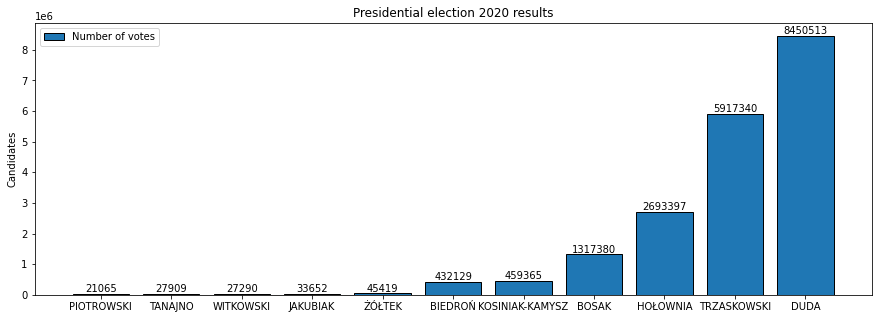

In [ ]:
plt.figure(figsize=[15,5])
plt.title("Presidential election 2020 results")
plt.ylabel("Candidates")
#plt.grid( linestyle='--', linewidth=1, axis='y')
plt.bar(names,votes,ec="black")
plt.legend(["Number of votes"])
for i in range(len(votes)):
  plt.text(i,votes[i], votes[i],ha="center",va="bottom")


plt.show()




In [ ]:
percent = list(df["PROCENT_WSZYSTKICH_GLOSOW"])

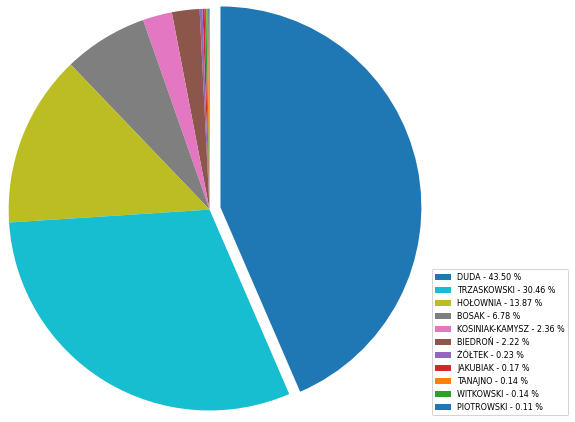

In [ ]:
x = names
y = percent
plt.figure(figsize=[5,7])
explode = (0,0,0,0,0,0,0,0,0,0.0,0.1)
patches, texts = plt.pie(y, explode=explode, startangle=90, radius=1.8)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, y)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(1.8, .3),
           fontsize=8)

plt.savefig('piechart.png', bbox_inches='tight')

plt.show()


In [ ]:
df

,NAZWISKO,LICZBA_GLOSOW,PROCENT_WSZYSTKICH_GLOSOW
1,PIOTROWSKI,21065,0.11
2,TANAJNO,27909,0.14
3,WITKOWSKI,27290,0.14
4,JAKUBIAK,33652,0.17
5,ŻÓŁTEK,45419,0.23
6,BIEDROŃ,432129,2.22
7,KOSINIAK-KAMYSZ,459365,2.36
8,BOSAK,1317380,6.78
9,HOŁOWNIA,2693397,13.87
10,TRZASKOWSKI,5917340,30.46


In [ ]:
df_sorted = df[(df['PROCENT_WSZYSTKICH_GLOSOW'] >= 1.0)]
#df_sorted = df_sorted.reset_index(drop=True)
df_sorted

,NAZWISKO,LICZBA_GLOSOW,PROCENT_WSZYSTKICH_GLOSOW
6,BIEDROŃ,432129,2.22
7,KOSINIAK-KAMYSZ,459365,2.36
8,BOSAK,1317380,6.78
9,HOŁOWNIA,2693397,13.87
10,TRZASKOWSKI,5917340,30.46
11,DUDA,8450513,43.50


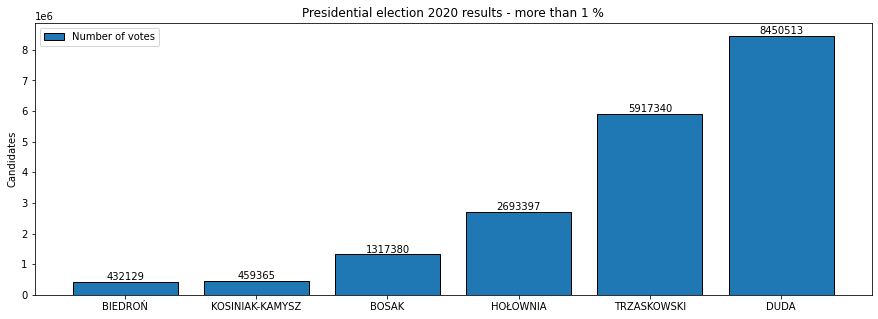

In [ ]:
names_sorted = list(df_sorted[("NAZWISKO")])
votes_sorted = list(df_sorted[("LICZBA_GLOSOW")])
plt.figure(figsize=[15,5])
plt.title("Presidential election 2020 results - more than 1 %")
plt.ylabel("Candidates")
#plt.grid( linestyle='--', linewidth=1, axis='y')
plt.bar(names_sorted,votes_sorted,ec="black")
plt.legend(["Number of votes"])
for i in range(len(votes_sorted)):
  plt.text(i,votes_sorted[i], votes_sorted[i],ha="center",va="bottom")


plt.show()



In [ ]:
#wykres kołowy w % pokazujący poparcie kandydatów, którzy weszli do 2 tury, z
#trzecią pozycją “pozostali” - sumującą wyniki kandydatów, którzy nie weszli do
#drugiej tury

In [ ]:
df


,NAZWISKO,LICZBA_GLOSOW,PROCENT_WSZYSTKICH_GLOSOW
1,PIOTROWSKI,21065,0.11
2,TANAJNO,27909,0.14
3,WITKOWSKI,27290,0.14
4,JAKUBIAK,33652,0.17
5,ŻÓŁTEK,45419,0.23
6,BIEDROŃ,432129,2.22
7,KOSINIAK-KAMYSZ,459365,2.36
8,BOSAK,1317380,6.78
9,HOŁOWNIA,2693397,13.87
10,TRZASKOWSKI,5917340,30.46


In [ ]:
#warunek kto wchodyi do 2 turz

In [ ]:
#new data

first = df['LICZBA_GLOSOW'][11]
second = df['LICZBA_GLOSOW'][10]
others = df['LICZBA_GLOSOW'][:9].sum()

all_votes = df['LICZBA_GLOSOW'].sum()
first_name = df["NAZWISKO"][11]
second_name = df["NAZWISKO"][10]

In [ ]:
df_new = pd.DataFrame (
    { 
        "LABELS": [
                   first_name, second_name, "OTHERS"
                   ],
     
          "VOTES": [
                    first, second, others]
          ,})



df_new.index = df_new.index+1
df_new

,LABELS,VOTES
1,DUDA,8450513
2,TRZASKOWSKI,5917340
3,OTHERS,5057606


In [ ]:
df_new['PERCENT'] = round(df_new["VOTES"]/all_votes * 100, 2)
df_new


,LABELS,VOTES,PERCENT
1,DUDA,8450513,43.50
2,TRZASKOWSKI,5917340,30.46
3,OTHERS,5057606,26.04


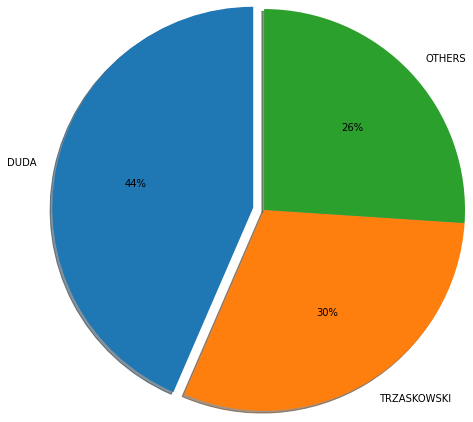

In [ ]:
x = list(df_new["LABELS"])
y = list(df_new["PERCENT"])
plt.figure(figsize=[5,7])
explode = (0.1,0,0)
plt.pie(y, labels = x, explode=explode, startangle=90, radius=1.8, shadow=True, autopct='%1.0f%%')
#labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, y)]

#sort_legend = True
#if sort_legend:
#    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
#                                          key=lambda x: x[2],
#                                          reverse=True))

#plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(1.8, .3),
#           fontsize=8)

#plt.savefig('piechart.png', bbox_inches='tight')

plt.show()

([<matplotlib.patches.Wedge at 0x7f2fd599c5d0>,
 [Text(-2.0367834492525962, 0.4217975590857515, 'DUDA'),
  Text(1.0324248799081088, -1.6895262257055164, 'TRZASKOWSKI'),
  Text(1.4450599804377706, 1.3535884355804726, 'OTHERS')],
 [Text(-1.155482918325992, 0.23928899986595514, '44%'),
  Text(0.5631408435862412, -0.9215597594757362, '30%'),
  Text(0.7882145347842385, 0.7383209648620759, '26%')])

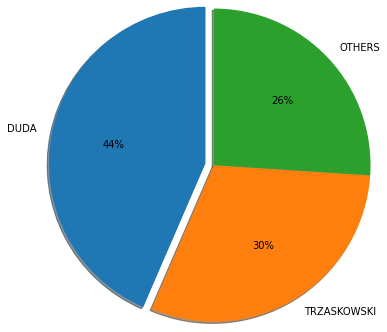

In [ ]:
plt.pie(y, labels = x, explode=explode, startangle=90, radius=1.8, shadow=True, autopct='%1.0f%%')